# Data Visualization

## Venustiano Soancatl Aguilar
### Center for Information Technology
### University of Groningen, the Netherlands



### How do visualizations work?


Data is transformed into graphic representations

- Graphics: Marks with visual properties are placed in space

- Encoding: The mapping of data to graphics

### Considerations
- Main goals: gain insights, exploration, presentation, discover hidden patterns
- Audience: conference, puper
- Data type: continuous, discrete 
- Data size
- Visualization technique

### Data visualization for exploration


- Data is unknown
- Data may have outliers
- Viewer controls the interaction
- Trying different mappings
- Look for trends and patterns
- Audience are mainly researchers
- Audience is active

### Data visualization for presentation
- Data is well known
- Data has been cleaned
- Audience is mostly passive
- Audience is large

![Data types](images/data_type.png)

<img src="images/visual_variables.png" width="800">

### Key characteristics of visual variables

• Selectivity: “Is A different from B?”

• Associativity: “Is A similar to B?”

• Order: “Is A more/greater/bigger than B?”

• Quantity: “How much is the difference between A and B?”

• Length: “How many different things?”
- Visual variables, original paper http://dx.doi.org/10.11575/PRISM/30495

![Vis techniques](images/vis_taxonomy.png)

### Loading some data

Visual Data Exploration for Balance Quantification in Real-Time During Exergaming

https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0170906



In [1]:
import pandas as pd

In [2]:
tableRes = pd.read_csv('data/results.txt',sep=' ')
tableRes

iSubj  trial  Age  Decade  medLrms51   medTI51        medK       meanK  \
1        1      1   76       7   0.189493  0.589529  207.800939  333.861515   
2        1      2   76       7   0.204152  0.697338  223.294322  319.601546   
3        1      3   76       7   0.217347  0.786131  136.400753  272.460861   
4        1      4   76       7   0.169569  1.020695  162.034626  289.927862   
5        1      5   76       7   0.170786  0.769747  141.767674  300.625818   
..     ...    ...  ...     ...        ...       ...         ...         ...   
396     40      6   58       5   0.304933  0.715350  263.249490  393.654382   
397     40      7   58       5   0.298630  0.758093  285.346624  436.866203   
398     40      8   58       5   0.295032  0.715015  292.177991  422.242295   
399     40      9   58       5   0.310277  0.710607  255.888346  392.841818   
400     40     10   58       5   0.317337  0.752008  225.649255  367.536358   

     medSpeed  medTIms51  medLcovD51  medLsd51  medLcov51  medLrmslD51  \
1    0.488721   0.806345    0.744766  0.020602   0.108687     1.259172   
2    0.518278   0.775451    0.506944  0.016446   0.078140     1.263366   
3    0.584193   0.511902    0.706127  0.047372   0.236467     0.782796   
4    0.590151   0.416398    0.701803  0.039017   0.265361     0.487570   
5    0.551706   0.550029    0.753161  0.036798   0.235907     0.646194   
..        ...        ...         ...       ...        ...          ...   
396  0.419596   0.989819    0.248116  0.009786   0.031676     2.273710   
397  0.364656   1.154292    0.162838  0.005467   0.017858     2.618494   
398  0.398149   1.077907    0.266188  0.009360   0.031146     2.475323   
399  0.413573   1.023273    0.242811  0.009074   0.028856     2.338997   
400  0.423233   1.002901    0.319482  0.012942   0.042028     2.281374   

     medLsdD51  
1     0.129068  
2     0.105902  
3     0.133917  
4     0.108637  
5     0.119610  
..         ...  
396   0.079016  
397   0.050360  
398   0.079460  
399   0.075648  
400   0.099211  

[400 rows x 15 columns]

### Histogram (1D)
Let's create a histogram using the 'medSpeed' column

In [3]:
tableRes["medSpeed"]

1      0.488721
2      0.518278
3      0.584193
4      0.590151
5      0.551706
         ...   
396    0.419596
397    0.364656
398    0.398149
399    0.413573
400    0.423233
Name: medSpeed, Length: 400, dtype: float64

### Plotly + Cufflinks

https://plotly.com/python/getting-started/

The plotly Python library (plotly.py) is an interactive, open-source plotting library.

https://github.com/santosjorge/cufflinks

This library binds the power of plotly with the flexibility of pandas for easy plotting.



```
import cufflinks as cf
---------------------------------------------------------------------------

ModuleNotFoundError                       Traceback (most recent call last)
<ipython-input-6-3178e833bc72> in <module>
----> 1 import cufflinks as cf

ModuleNotFoundError: No module named 'cufflinks'
```
Temporal solution, open CLI
```
conda install -y -c conda-forge cufflinks-py

```

### Permanent solution 
Create Dockerfile.datavis01
```
FROM jupyter/datascience-notebook:8b4d6f6ac0d7

RUN conda install -y -c conda-forge cufflinks-py
```
Building the image
```
$ docker build -t jupyter/datascience-notebook:vis \
        -f docker/Dockerfile.datavis01 docker/
```

Running the container
```
$ docker run --rm -p 8888:8888 -e JUPYTER_ENABLE_LAB=yes \
    -v "$PWD":/home/jovyan/work jupyter/datascience-notebook:vis
```

In [4]:
import cufflinks as cf
cf.go_offline()

from plotly.offline import iplot

cf.help()

Use 'cufflinks.help(figure)' to see the list of available parameters for the given figure.
Use 'DataFrame.iplot(kind=figure)' to plot the respective figure
Figures:
	bar
	box
	bubble
	bubble3d
	candle
	choroplet
	distplot
	heatmap
	histogram
	ohlc
	pie
	ratio
	scatter
	scatter3d
	scattergeo
	spread
	surface
	violin


In [5]:
tableRes['medSpeed'].iplot(
    kind='hist',
    bins=50,
    xTitle='Speed',
    linecolor='black',
    yTitle='count',
    title='Speed Distribution')

In [6]:
# Try to add a curve distribution
pd.DataFrame(tableRes['medSpeed']).iplot(
    kind='distplot',
    bin_size=0.1,)

AttributeError: 'Layout' object has no attribute 'get'

### Google the error (hopefully there is a solution)

https://github.com/santosjorge/cufflinks/issues/222

... solution to this @xoelop.
Try 
```
fig = cf.datagen.distplot(3).figure(kind='distplot',bin_size=.1)
fig.show()

```
instead.

...

In [7]:
# pd.DataFrame(tableRes['medSpeed']).iplot(kind='distplot',bin_size=.01,show_rug=False)
fig = pd.DataFrame(tableRes['medSpeed']).figure(kind='distplot',bin_size=.01,show_rug=False); fig.show()

In [8]:
tableRes['medSpeed'].iplot(kind='violin',show_rug=False)

In [9]:
# Parallel violin plots (a violin plot for each variable)
# According to the documentation, we need the data in long format
cf.help('violin')

VIOLIN
Violin Chart
Distribution chart


Parameters:
    data_header : string
        Name of column that contains the data
    categories : string
        Name of the column that contains the categories
    show_rug : bool
        Defines if the rug is displayed
        Default: True
    sort : bool
        If True then the categories are sorted in alphabetical order
        Default: False


    colors : dict, list or string
        Trace color
        	string : applies to all traces
        	list : applies to each trace in the order specified
        	dict : {column:value} for each column in the dataframe
        values
        	colorname : see cufflinks.colors.cnames
        	hex : '#ffffff'
        	rgb : 'rgb(23,50,23)'
        	rgba : 'rgba(23,50,23,.5)
    colorscale : string
        Color scale name
        If the color is preceded by a minus (-)
        then the scale is inversed.
        Only valid if 'colors' is null.
        see cufflinks.colors.scales() for all available s

### Reshaping the data
Wide format

```
   'obs'  'B'  'C'
   a       1    2
   b       3    4
   c       5    6
```
Long format
```
   'obs' 'variables'  'values'
     a        B         1
     b        B         3
     c        B         5
     a        C         2
     b        C         4
     c        C         6
```

In [11]:
longTable = pd.melt(tableRes, id_vars=['iSubj','trial','Age','Decade'], var_name='myVars')
longTable  

iSubj  trial  Age  Decade     myVars     value
0         1      1   76       7  medLrms51  0.189493
1         1      2   76       7  medLrms51  0.204152
2         1      3   76       7  medLrms51  0.217347
3         1      4   76       7  medLrms51  0.169569
4         1      5   76       7  medLrms51  0.170786
...     ...    ...  ...     ...        ...       ...
4395     40      6   58       5  medLsdD51  0.079016
4396     40      7   58       5  medLsdD51  0.050360
4397     40      8   58       5  medLsdD51  0.079460
4398     40      9   58       5  medLsdD51  0.075648
4399     40     10   58       5  medLsdD51  0.099211

[4400 rows x 6 columns]

https://pandas.pydata.org/docs/reference/api/pandas.melt.html

In [12]:
# Plotting without normalization
longTable.iplot(kind='violin',data_header='value',categories='myVars',show_rug=False)

In [13]:
# Normalizing the data
longTable["normVal"]=longTable.groupby('myVars').transform(lambda value: (value - value.mean()) / value.std())["value"]
longTable

iSubj  trial  Age  Decade     myVars     value   normVal
0         1      1   76       7  medLrms51  0.189493 -0.406276
1         1      2   76       7  medLrms51  0.204152 -0.168225
2         1      3   76       7  medLrms51  0.217347  0.046049
3         1      4   76       7  medLrms51  0.169569 -0.729817
4         1      5   76       7  medLrms51  0.170786 -0.710069
...     ...    ...  ...     ...        ...       ...       ...
4395     40      6   58       5  medLsdD51  0.079016 -1.090094
4396     40      7   58       5  medLsdD51  0.050360 -2.066097
4397     40      8   58       5  medLsdD51  0.079460 -1.074982
4398     40      9   58       5  medLsdD51  0.075648 -1.204796
4399     40     10   58       5  medLsdD51  0.099211 -0.402274

[4400 rows x 7 columns]

In [14]:
longTable.iplot(kind='violin',data_header='normVal',categories='myVars')
# all the plots are overlapped

In [15]:
### Alternative
# https://plotly.com/python/violin/
import plotly.graph_objects as go
fig = go.Figure()

#vars = ['medLrms51','medTI51','medK','meanK','medTIms51','medLcovD51','medLsd51','medLcov51','medLrmslD51']
vars = tableRes.columns[4:]
for var in vars:
    fig.add_trace(go.Violin(x=longTable['myVars'][longTable['myVars'] == var],
                            y=longTable['normVal'][longTable['myVars'] == var],
                            name=var,
                            box_visible=True,
                            meanline_visible=True))

In [16]:
fig.show()

In [17]:
# Looking for differences between older and younger people
fig = go.Figure()

fig.add_trace(go.Violin(x=longTable['myVars'][longTable['Age'] >= 60 ],
                        y=longTable['normVal'][longTable['Age'] >= 60 ],
                        legendgroup='Older', name='Older',
                        #line_color='blue',
                        line_color='#1b9e77'),
             );
fig.add_trace(go.Violin(x=longTable['myVars'][longTable['Age'] < 60 ],
                        y=longTable['normVal'][longTable['Age'] < 60 ],
                        legendgroup='Younger', name='Younger',
                        # line_color='orange',
                        line_color='#7570b3')
             );

#fig.update_traces(box_visible=False, meanline_visible=True)


In [18]:
#fig.update_layout(violinmode='group')
fig.show()

In [19]:
import plotly.express as px
longTable['Old'] = longTable['Age'] < 60
fig = px.violin(longTable, y="normVal", x="myVars", color="Old",violinmode='overlay',
          hover_data=longTable.columns)
fig.show()

### Preparing for publication
- Remove innecessary elements
- Select aproppriate visual variables
- Add appropriate labels
- Save a high resolution image
- Avoid chart junk

### Transparent background
google 'transparent background plotly'

[Setting background color to transparent in plotly](https://stackoverflow.com/questions/29968152/python-setting-background-color-to-transparent-in-plotly-plots)

[Having a transparent background in plotly](https://community.plotly.com/t/having-a-transparent-background-in-plotly-express/30205/2)

```
fig.update_layout({
‘plot_bgcolor’: ‘rgba(0, 0, 0, 0)’,
‘paper_bgcolor’: ‘rgba(0, 0, 0, 0)’,
})
```

In `rgba(0,0,0,0)` the `a` letter stands for the alpha channel, so setting it to `0`, makes the color transparent.

In [20]:
# Trying the code
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)'
})
fig.show()

### Selecting appropriate colors

Colorbrewer

https://colorbrewer2.org/#type=qualitative&scheme=Dark2&n=3

Discrete Colors in Python 

https://plotly.com/python/discrete-color/

In [21]:
fig = px.violin(longTable, y="normVal", x="myVars", color="Old",violinmode='overlay',
                color_discrete_sequence=["#1b9e77", "#7570b3"],
               )
fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
}); fig.show()

### Labels
Enumerated Ticks with Tickvals and Ticktext

https://plotly.com/python/axes/

In [22]:
fig.update_xaxes(
    ticktext=['RMS','TI', 'K', 'meanK','Speed','TIms','CoV','SD', 'LCoV', 'Lrms', 'LSD'],
    tickvals=list(tableRes.columns[4:]),
    title_text='Measures',
)

fig.update_yaxes(title_text='Value')
fig.show()

### Saving the image
```
# https://plotly.com/python/static-image-export/
fig.write_image("images/overlapping_violin_plots.pdf")
```
```
--------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-22-d72c8d17468c> in <module>
      1 # https://plotly.com/python/static-image-export/
----> 2 fig.write_image("images/overlapping_violin_plots.pdf")
/opt/conda/lib/python3.7/site-packages/plotly/basedatatypes.py in write_image(self, *args, **kwargs)
   2822         import plotly.io as pio
   2823 
-> 2824         return pio.write_image(self, *args, **kwargs)
   2825 
   2826     # Static helpers

/opt/conda/lib/python3.7/site-packages/plotly/io/_orca.py in write_image(fig, file, format, scale, width, height, validate)
   1768     # Do this first so we don't create a file if image conversion fails
   1769     img_data = to_image(
-> 1770         fig, format=format, scale=scale, width=width, height=height, validate=validate
   1771     )
   1772 

/opt/conda/lib/python3.7/site-packages/plotly/io/_orca.py in to_image(fig, format, width, height, scale, validate)
   1533     # Make sure orca sever is running
   1534     # -------------------------------
-> 1535     ensure_server()
   1536 
   1537     # Handle defaults

/opt/conda/lib/python3.7/site-packages/plotly/io/_orca.py in ensure_server()
   1388         # Validate orca executable only if server_url is not provided
   1389         if status.state == "unvalidated":
-> 1390             validate_executable()
   1391         # Acquire lock to make sure that we keep the properties of orca_state
   1392         # consistent across threads

/opt/conda/lib/python3.7/site-packages/plotly/io/_orca.py in validate_executable()
   1191     $ {executable} --help
   1192 """.format(
-> 1193                 executable=" ".join(executable_list)
   1194             )
   1195         )

ValueError: 
The orca executable is required in order to export figures as static images,
but the executable that was found at '/opt/conda/bin/orca'
does not seem to be a valid plotly orca executable. Please refer to the end of
this message for details on what went wrong.

If you haven't installed orca yet, you can do so using conda as follows:

    $ conda install -c plotly plotly-orca

Alternatively, see other installation methods in the orca project README at
https://github.com/plotly/orca

After installation is complete, no further configuration should be needed.

If you have installed orca, then for some reason plotly.py was unable to
locate it. In this case, set the `plotly.io.orca.config.executable`
property to the full path of your orca executable. For example:

    >>> plotly.io.orca.config.executable = '/path/to/orca'

After updating this executable property, try the export operation again.
If it is successful then you may want to save this configuration so that it
will be applied automatically in future sessions. You can do this as follows:

    >>> plotly.io.orca.config.save()

If you're still having trouble, feel free to ask for help on the forums at
https://community.plot.ly/c/api/python

The error encountered is that no output was returned by the command
    $ /opt/conda/bin/orca --help
```

### Installing orca on docker

https://plotly.com/python/static-image-export/

Not so easy!!

https://github.com/plotly/orca/issues/150

https://github.com/plotly/orca/blob/80855093193afba09a4dbebaa7bae776be88e15e/README.md#linux-troubleshooting-headless-server-configuration

https://github.com/mathieuboudreau/orca-plotly-dockerfile/blob/master/Dockerfile


In [23]:
# documentation
# https://plotly.com/python/static-image-export/ 
# https://plotly.com/python/setting-graph-size/
fig.write_image("images/overlapping_violin_plots.pdf")

# eps format needs poppler
# conda install -y poppler
fig.write_image("images/overlapping_violin_plots.eps")
fig.write_image("images/overlapping_violin_plots.png",width=600, height=350, scale=3)

# How to generate images with a resolution higher than 300 dpi?

### High quality plots with latex

- tikz
- tikzDevice (only in R)
- Useful for publications 
- Match plot and main text fonts
- Include complex mathematical formulae
- Unfortunately does not work with plotly
- r magic works in jupyer notebook

In [24]:
# activate R magic
%load_ext rpy2.ipython

/opt/conda/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning:

pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.



In [25]:
%%R
# r imports …
library(ggplot2)
library(data.table)

In [26]:
%%R -i longTable -w 900 -h 480 -u px
p <- ggplot(longTable, aes(x= myVars,y=normVal,color=Old)) + 
  geom_violin(alpha=0.3,position="identity")+
    theme_bw()


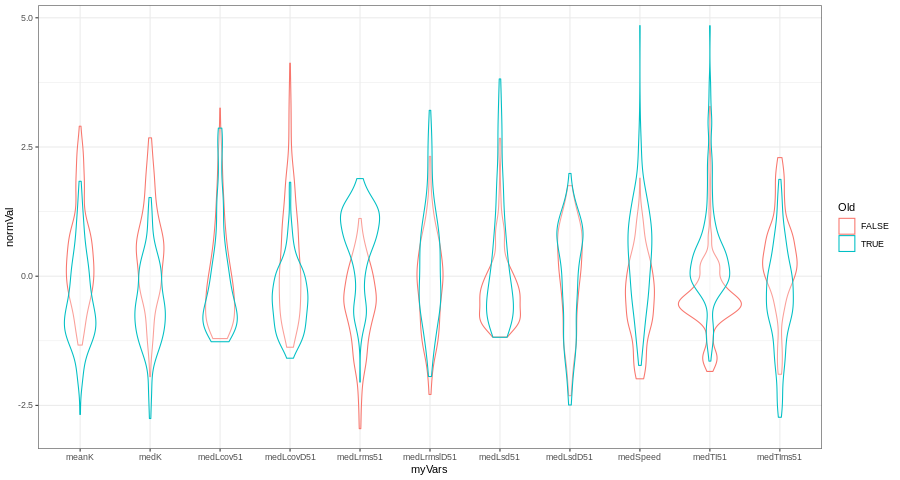

In [27]:
%%R -w 900 -h 480 -u px
p

In [28]:
%%R
# Dockerfile
# RUN R -e "install.packages('tikzDevice',dependencies=TRUE, repos='http://cran.rstudio.com/')"

library('tikzDevice')

In [29]:
%%R 
tikz("images/overlapping_violin_plots_R.tex",standAlone = TRUE, width=8, height=4)
   print(p)
dev.off()

png 
  2 


In [30]:
!pwd

/home/jovyan/work/notebooks/slides


In [31]:
!pdflatex -output-directory=images/ images/overlapping_violin_plots_R.tex

This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
(./images/overlapping_violin_plots_R.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 3 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/pgf/frontendlayer/tikz.sty
(/usr/share/texlive/texmf-dist/tex/latex/pgf/basiclayer/pgf.sty
(/usr/share/texlive/texmf-dist/tex/latex/pgf/utilities/pgfrcs.sty
(/usr/share/texlive/texmf-dist/tex/generic/pgf/utilities/pgfutil-common.tex
(/usr/share/texlive/texmf-dist/tex/generic/pgf/utilities/pgfutil-common-lists.t
ex)) (/usr/share/texlive/texmf-dist/tex/generic/pgf/utilities/pgfutil-latex.def
(/usr/share/texlive/texmf-dist/tex/latex/ms/everyshi.sty))
(/usr/share/texlive/texmf-dist/tex/generic

In [35]:
# https://stackoverflow.com/questions/19470099/view-pdf-image-in-an-ipython-notebook
from IPython.display import IFrame
IFrame("./images/overlapping_violin_plots_R.pdf", width=1000, height=600)

### Suggested assignment (01)
Create a grouped bar chart showing speed `medSpeed` and curvature `medK` average values per participant `iSubj`.
1. Create a new normalized variable `normVal2` in `longTable` using the formula `(value - value.min())/(value.max())-value.min())` 
2. Create a new (subset) dataframe `dfKS` that contains only curvature and speed variables. Tip: [Subset dataframes](https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html)
3. Estimate mean curvature and speed `normVal2` grouped by `['iSubj','myVars','Age']`. Tip: [Dataframe group by](https://pandas.pydata.org/pandas-docs/version/0.23.1/generated/pandas.core.groupby.DataFrameGroupBy.agg.html), covert to the result to DataFrame and use `reset_index()`.
4. Select colors from https://colorbrewer2.org
5. Create the grouped bar chart. Tip: [Bar chart](https://plotly.com/python/bar-charts/), look at the examples in previous slides to change the tick labels.

### Resulting plot.
<img src="images/grouped_bar_chart.png" width="1000">
Try to create a similar plot using `R`, `ggplot2` and `tikzDevice` (optional).